# Loading the dataset

In [3]:
import pandas as pd
from sys import maxsize
import matplotlib.pyplot as plt
INT_MAX = maxsize
import time

In [4]:
f = open("D:/Semester#7/Algo/Project/DFSVisited.txt", "a")
f1 = open("D:/Semester#7/Algo/Project/BFSVisited.txt", "a")
f2 =open("D:/Semester#7/Algo/Project/Kruskal.txt", "a")
f3 =open("D:/Semester#7/Algo/Project/Prims.txt", "a") 
f4 = open("D:/Semester#7/Algo/Project/Dijkstra.txt", "a")
f5 = open("D:/Semester#7/Algo/Project/Bellmanford.txt", "a")
f6 = open("D:/Semester#7/Algo/Project/Degree.txt", "a")

In [59]:
class Graph:
    
    def __init__(self,n,e):
        self.Nodes = n
        self.Edges = e
        self.data = []
        self.matrix = []
        self.visited = [False] * n
        self.parent = [i for i in range(n)]
        self.BellMatrix = []
        self.adj_list = []
        self.traversal = []
        #Initializing the Adjacency List          
        self.adj_list = [0] * n
        for i in range(n):
            self.adj_list[i] = []
        
        
#     def __init__(self):
#         self.Nodes = 0
#         self.Edges = 0
#         self.data = []
#         self.matrix = []
#         self.visited = [False] * self.Nodes
        
    def makematrix (self,size):
        
        # Create List of list of size 50 for testing purpose
        for i in range(size):
            self.matrix.append([])
            for j in range(size): 
                self.matrix[i].append(INT_MAX)    
        
        #Initializing the Adjacency List          
        self.adj_list = [0] * size
        for i in range(size):
            self.adj_list[i] = []
            
    def setMatrix(self,mat):
        self.matrix = mat
    def retAdjacencyList(self):
        return self.adj_list
    def retBellMatrix(self):
        return self.BellMatrix
    def retData(self):
        return self.data
    def retVertices(self):
        return self.Vertices
    def retEdges(self):
        return self.Edges
    def retAdjacencyMatrix(self):
        return self.matrix
    def retVisited(self):
        return self.visited
    def addListedge(self, i,j):
        
        self.adj_list[i].append(j)
        
    def add_Bell_edge(self,edge):
        
        self.BellMatrix.append(edge)
        
    def makeadjacencyhelp(self,edge):
        
#         print("edge",edge)
        index1 = edge[0]
        index2 = edge [1]
        weight = edge [2]
        self.matrix[index1][index2] = weight
#         self.matrix[index2][index1] = weight
        
    def makeAdjacencyMatrix(self,size):
        
        for i in range(size):
            
            self.makeadjacencyhelp(self.data[i])
            self.add_Bell_edge(self.data[i])
            self.addListedge(self.data[i][0],self.data[i][1])
        
    def ReadFile(self,path):
        self.data = pd.read_csv(path)
        self.data.columns =['Node', 'Connected to', 'Weight','Temp']
        
        # Choosing only required Columns of the Dataset
        self.data = self.data[['Node','Connected to','Weight']]
        
        #Nodes
        self.Nodes = max(self.data['Connected to'])
        # Edges 
        self.Edges = len(self.data['Connected to']+(self.data['Node']) )
        
        print("NODE: ",self.Nodes)
        
        print("Edges: ",self.Edges)
        
        #Converting DataFrame to a list 
        self.data = self.data.values.tolist()
    
        print("File Reading Done")
        
    def printSolution(self, dist):
        
        f4.write("Vertex \t Distance from Source\n\n\n")
#         print("Vertex \t Distance from Source")
        for node in range(1000):
            f4.write(str(node))
            f4.write("\t\t")
            f4.write(str(dist[node]))
            f4.write("\n")
            print(node, "\t\t", dist[node])
    def minDistance(self, dist, sptSet):
        min = INT_MAX
        min_index = -1
        for v in range(2000):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index

    def dijkstra(self, src):
 
        dist = [INT_MAX] * 2000
        dist[src] = 0
        sptSet = [False] * 2000
 
        for cout in range(2000):
        
            u = self.minDistance(dist, sptSet)
 
            sptSet[u] = True
    
            for v in range(2000):
                if (self.matrix[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.matrix[u][v]): 
                    dist[v] = dist[u] + self.matrix[u][v]
        self.printSolution(dist)
        return dist
    def BellmanFord(self, src):
 
        dist = [INT_MAX] * 2000
        dist[src] = 0
 
        for _ in range(2000 - 1):
        
            for u, v, w in self.BellMatrix:
                if dist[u] != INT_MAX and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
 
        for u, v, w in self.BellMatrix:
            if dist[u] != INT_MAX and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return
 
        self.printSolution(dist)
        
    def isValidEdge(self,u, v, MST):
        if u == v:
            return False
        if MST[u] == False and MST[v] == False:
            return False
        elif MST[u] == True and MST[v] == True:
            return False
        return True
    def Prims(self):
        MST = [False] * 100
        MST[0] = True
        edge_count = 0
        mincost = 0
        while edge_count < 100 - 1:
            # Find minimum weight valid edge.
            minn = INT_MAX
            a = -1
            b = -1
            for i in range(100):
                for j in range(100):
                    if self.matrix[i][j] < minn:
                        if self.isValidEdge(i, j, MST):
                            minn = self.matrix[i][j]
                            a = i
                            b = j

            if a != -1 and b != -1:
                print("Edge %d: (%d, %d) cost: %d" %
                     (edge_count, a, b, minn))
                edge_count += 1
                mincost += minn
                MST[b] = MST[a] = True

        print("Minimum cost = %d" % mincost)

    def find(self,i):
        while self.parent[i] != i:
            i = self.parent[i]
        return i
    def union(self,i, j):
        a = self.find(i)
        b = self.find(j)
        self.parent[a] = b

    def kruskal(self):
        
        mincost = 0 

        for i in range(500):
            self.parent[i] = i

        edge_count = 0
        while edge_count < 500 - 1:
            min = INT_MAX
            a = -1
            b = -1
            for i in range(500):
                for j in range(500):
                    if self.find(i) != self.find(j) and self.matrix[i][j] < min:
                        min = self.matrix[i][j]
                        a = i
                        b = j
            self.union(a, b)
            f2.write('Edge {}:({}, {}) cost:{}'.format(edge_count, a, b, min))
            f2.write("\n")
            print('Edge {}:({}, {}) cost:{}'.format(edge_count, a, b, min))
            edge_count += 1
            mincost += min
        f2.write("Minimum cost= {}".format(mincost))
        print("Minimum cost= {}".format(mincost))
        
    def BFS(self,start):
        
        self.traversal.clear()
        
        visited = [False] * 2000
        q = [start]
 
        visited[start] = True
        
        while q:
            vis = q[0]
 
            self.traversal.append(vis)
#             print(vis, end = ' ')
            
            q.pop(0)
            f1.write("\nQUEUE----\n")
            f1.write(str(q))
            for i in range(2000):
                if (self.matrix[vis][i] >= 1 and (not visited[i])):
                    q.append(i)
                    visited[i] = True
    def DFS(self, start,visited):
        
        f.write("visited\n")
        f.write(str(visited))
        f.write("\n")
        
        self.traversal.append(start)
        
#         print(start, end = ' ')
        
        visited[start] = True
 
        for i in range(2000):
            
#             print("i , start ",i,start)
            if (self.matrix[start][i] >= 1 and (not visited[i])):
        
                self.DFS(i,visited)
                
    def gettraversal(self):
        return self.traversal
    def Diameter_of_Graph(self):
        
        dist_matrix = []
        for i in range(6005-1):
            dist_matrix.append (max(self.dijkstra(i+1)))
            
        return max(dist_matrix)
    
    # hehe
    def CycleDetection(self,size):
        visited = [False] * size
        helper = [False] * size
        for i in range(size):
            if visited[i] == False:
                ans = self.CyclicHelper(i,visited,helper)
                if ans == True:
                    return True
        return False

    def CyclicHelper(self,i, visited,helper):
        visited[i] = True
        helper[i] = True
        neighbours = self.adj_list[i]
        for k in range(len(neighbours)):
            curr = neighbours[k]
            if helper[curr] == True:
                return True
            if visited[curr] == False:
                ans = self.CyclicHelper(curr,visited,helper)
                if ans == True:
                    return True
        helper[i] = False
        return False
    
    def Average_Degree(self):
        degree_dict = {}
        for i in range(2000):
            degree_dict[self.data[i][0]] = 0
        for j in range(2000):
            degree_dict[self.data[j][0]] += 1
        
        _sum = 0
        
        for k,v in degree_dict.items():
            _sum += v
        print(degree_dict)
        return (_sum/2000)
        
    def DrawGraph(self):
        
        x1 = [100,500,1000,2000]
        y1 = [1670168620.9475782,1670168650.9188235,1670168687.0909095,1670168728.5584736]
        
        plt.plot(x1, y1, label = "BFS")

        x2 = [100,500,1000,2000]
        y2 = [1670168078.487259,1670168120.452512,1670168154.0613387,1670168514.0380251]
        
        plt.plot(x2, y2, label = "DFS")
        
        
        x2 = [100,500,1000,2000]
        y2 = [1670168895.9778235,1670168901.9778235,1670168980.9778235,1670169011.9778235]
        
        plt.plot(x2, y2, label = "Prims")
        
        
        x2 = [100,500,1000,2000]
        y2 = [1670168620.9475782,1670169025.1912568,1670169525.1912568,1670170125.1912568]
        
        plt.plot(x2, y2, label = "Kruskal")
        
        x2 = [100,500,1000,2000]
        y2 = [1670169212.3858154,1670169340.8708196,1670169393.516899,1670169444.0837147]
        
        plt.plot(x2, y2, label = "Dijkstra")
        
        x2 = [100,500,1000,2000]
        y2 = [1670169610.3741922,1670169661.5452466,1670169714.4058297,1670169749.8290162]
        
        plt.plot(x2, y2, label = "BellmanFord")
        
        x2 = [100,500,1000,2000]
        y2 = [1670169025.1912568,1670169393.516899,1670169444.0837147,1670169547.1237677]
        
        plt.plot(x2, y2, label = "Diameter")
        
        x2 = [100,500,1000,2000]
        y2 = [1670169848.5899823,1670169890.237304,1670169914.461556,1670169950.9688258]
        
        plt.plot(x2, y2, label = "CycleDetection")
        
        x2 = [100,500,1000,2000]
        y2 = [1670169991.4073591,1670170165.7726169,1670170195.5077057,1670170225.3456898]
        
        plt.plot(x2, y2, label = "AverageDegree")
        
        
        plt.xlabel('DataSet Size')
        
        plt.ylabel('Execution Time')
        
        plt.title('Execution Time Comparison')

        # show a legend on the plot
        plt.legend()
    def ExecutionTime(self,func):
        start = time.time()
        # function HERE
        end = time.time()
        return end - start
        

NODE:  6005
Edges:  35591
File Reading Done


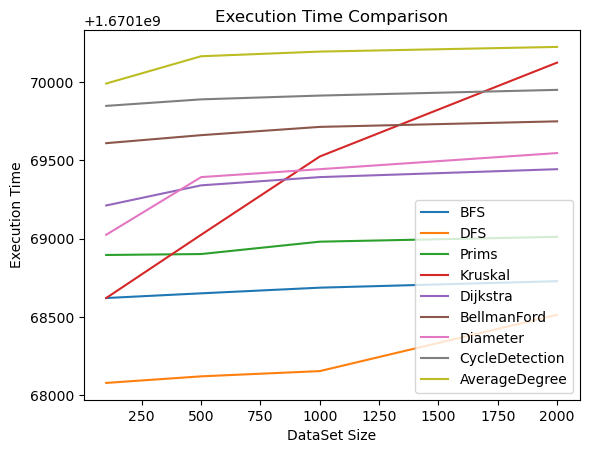

In [60]:
def main():
    
    temp_Size = 6005
    graph = Graph(temp_Size,temp_Size)
    
    path = "D:/Semester#7/Algo/Project/soc-sign-bitcoinotc.csv"
    
    
    
    graph.ReadFile(path)
    
    graph.makematrix(temp_Size)
    
    
#     graph.makeAdjacencyMatrix(temp_Size)
    

# ------------------DFS--------------------

#     print("DFS")
    
    
    
#     visited = [False] * temp_Size
    
#     graph.DFS(1,visited)

    
#     tra = graph.gettraversal()

#     dfs_f = open("D:/Semester#7/Algo/Project/DFSTraversal.txt", "a")
    
#     dfs_f.write("-----------------------DFS Traversal----------------------\n")
#     for x in range(len(tra)):
#         dfs_f.write(str(tra[x]))
#         dfs_f.write(" ")
    
#     print(tra)

#------------------BFS------------------------
#     print("\nBFS")
    
   
    
#     graph.BFS(1)
    
    
#     tra = graph.gettraversal()
    
#     dfs_f = open("D:/Semester#7/Algo/Project/BFSTraversal.txt", "w")
    
#     dfs_f.write("-----------------------BFS Traversal----------------------\n")
#     for x in range(len(tra)):
#         dfs_f.write(str(tra[x]))
#         dfs_f.write(" ")
    

    
#----------------Prims----------------------
#     cost = [[INT_MAX, 2, INT_MAX, 6, INT_MAX],
#             [2, INT_MAX, 3, 8, 5],
#             [INT_MAX, 3, INT_MAX, INT_MAX, 7],
#             [6, 8, INT_MAX, INT_MAX, 9],
#             [INT_MAX, 5, 7, 9, INT_MAX]]

#     Pgraph = Graph(5,5)
    
#     Pgraph.makematrix(5)
    
#     Pgraph.setMatrix(cost)
    
#     Pgraph.Prims()
    
    
    
#     graph.Prims()
    

   
#--------------Kruskal----------------------
    
#     Kcost = [[INT_MAX, 2, INT_MAX, 6, INT_MAX],
#             [2, INT_MAX, 3, 8, 5],
#             [INT_MAX, 3, INT_MAX, INT_MAX, 7],
#             [6, 8, INT_MAX, INT_MAX, 9],
#             [INT_MAX, 5, 7, 9, INT_MAX]]

#     Kgraph = Graph(5,5)
    
#     Kgraph.makematrix(5)
    
#     Kgraph.setMatrix(Kcost)
    
#     Kgraph.kruskal()
    
    
#     graph.kruskal()

#--------------Dijkstra---------------------
#     matrix = [
#             [ 0, 4, 0, 0, 0, 0, 0, 8, 0 ],
#             [ 4, 0, 8, 0, 0, 0, 0, 11, 0 ],
#             [ 0, 8, 0, 7, 0, 4, 0, 0, 2 ],
#             [ 0, 0, 7, 0, 9, 14, 0, 0, 0 ],
#             [ 0, 0, 0, 9, 0, 10, 0, 0, 0 ],
#             [ 0, 0, 4, 0, 10, 0, 2, 0, 0 ],
#             [ 0, 0, 0, 14, 0, 2, 0, 1, 6 ],
#             [ 8, 11, 0, 0, 0, 0, 1, 0, 7 ],
#             [ 0, 0, 2, 0, 0, 0, 6, 7, 0 ] ]
    
#     Dgraph = Graph(9,9)
    
#     Dgraph.makematrix(9)
    
#     Dgraph.setMatrix(matrix)
    
#     Dgraph.dijkstra(0)
    
   
#     graph.dijkstra(1)

    
#---------Diameter_of_Graph-----------------

    
#     print ("DIAMETER OF GRAPH---",graph.Diameter_of_Graph())
    

# -----------BEllmanford -------------------
    
#     Bgraph = Graph(9,9)
    
#     Bgraph.add_Bell_edge([0, 1, -1])
#     Bgraph.add_Bell_edge([0, 2, 4])
#     Bgraph.add_Bell_edge([1, 2, 3])
#     Bgraph.add_Bell_edge([1, 3, 2])
#     Bgraph.add_Bell_edge([1, 4, 2])
#     Bgraph.add_Bell_edge([3, 2, 5])
#     Bgraph.add_Bell_edge([3, 1, 1])
#     Bgraph.add_Bell_edge([4, 3, -3])
    
#     Bgraph.BellmanFord(0)

    
    
#     graph.BellmanFord(1)
    
    


# -----------CYCLE DETECTION PART-----------

#     g = Graph(4,4)
#     g.addListedge(0, 1)
#     g.addListedge(0, 2)
#     g.addListedge(1, 2)
#     g.addListedge(2, 0)
#     g.addListedge(2, 3)
#     g.addListedge(3, 3)
    
    
    
#     print(graph.CycleDetection(temp_Size))
    
    
    
#     if ( g.CycleDetection(4) ):
#         print ("Graph has a CYCLE")
#     else:
#         print ("Graph has no cycle")
    
    
 #--------------Average Degree--------------------------

#     print(graph.Average_Degree())    
    
#-------------Plotting The Graph-----------------------

    graph.DrawGraph()

if __name__ == "__main__":
    main()